In [26]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from keras.applications import InceptionV3

In [15]:
dataset = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn'
train_dir = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train'
test_dir = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test'

In [27]:
TRAIN_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train'
VAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test'

In [28]:
TRAIN_NORMAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train\NORMAL'
TRAIN_PNE_PATH =r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train\PNEUMONIA'


VAL_NORMAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test\NORMAL'
VAL_PNEU_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test\PNEUMONIA'

In [29]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
   # shear_range = 0.2,
   # zoom_range = 0.2,
    #horizontal_flip = True,
)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')

Found 527 images belonging to 2 classes.


In [30]:
train_generator.class_indices

{'NORAMAL': 0, 'PNEUMONIA': 1}

In [31]:
validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')

Found 102 images belonging to 2 classes.


In [32]:
epochs = 10
stepsperepoch=9
validationsteps=1

In [33]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

In [34]:
model = InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 149, 149, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

                                                                                                  
 conv2d_199 (Conv2D)         (None, 35, 35, 32)           6144      ['average_pooling2d_18[0][0]']
                                                                                                  
 batch_normalization_193 (B  (None, 35, 35, 64)           192       ['conv2d_193[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_195 (B  (None, 35, 35, 64)           192       ['conv2d_195[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_198 (B  (None, 35, 35, 96)           288       ['conv2d_198[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_205 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_205[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_206 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_206[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_200[0][0]',      
                                                                     'activation_202[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_216 (Conv2D)         (None, 35, 35, 96)           55296     ['activation_215[0][0]']      
                                                                                                  
 batch_normalization_216 (B  (None, 35, 35, 96)           288       ['conv2d_216[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_216 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_216[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_21

                                                                                                  
 conv2d_218 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_221 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_220[0][0]']      
                                                                                                  
 conv2d_226 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_225[0][0]']      
                                                                                                  
 conv2d_227 (Conv2D)         (None, 17, 17, 192)          147456    ['average_pooling2d_21[0][0]']
                                                                                                  
 batch_normalization_218 (B  (None, 17, 17, 192)          576       ['conv2d_218[0][0]']          
 atchNorma

 activation_235 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_235[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_22 (Aver  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_228 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_231 (Conv2D)         (None, 17, 17, 192)          215040    ['activation_230[0][0]']      
                                                                                                  
 conv2d_23

 atchNormalization)                                                                               
                                                                                                  
 activation_240 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_240[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_245 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_245[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_23 (Aver  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_250 (B  (None, 17, 17, 192)          576       ['conv2d_250[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_255 (B  (None, 17, 17, 192)          576       ['conv2d_255[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_250 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_250[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_259 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_258[0][0]']      
                                                                                                  
 conv2d_263 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_262[0][0]']      
                                                                                                  
 batch_normalization_259 (B  (None, 8, 8, 320)            960       ['conv2d_259[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_263 (B  (None, 8, 8, 192)            576       ['conv2d_263[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_270 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_270[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_271 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_271[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_272 (B  (None, 8, 8, 192)            576       ['conv2d_272[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_276 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_276[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_279 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_279[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_280 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_280[0][0
 )                                                                  ]']                           
          

In [36]:
hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)

C:\Users\pirat\AppData\Local\Temp\ipykernel_15448\898421478.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10


ValueError: in user code:

    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\pirat\anaconda3\Lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 3) vs (None, 1)).


In [39]:
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


TRAIN_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train'
VAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test'

TRAIN_NORMAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train\NORMAL'
TRAIN_PNE_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train\PNEUMONIA'

VAL_NORMAL_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test\NORMAL'
VAL_PNEU_PATH = r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test\PNEUMONIA'


In [40]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Training parameters
epochs = 10
steps_per_epoch = 9
validation_steps = 1

# Train the model
hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Found 527 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 111, 111, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_

 conv2d_292 (Conv2D)         (None, 25, 25, 96)           82944     ['activation_291[0][0]']      
                                                                                                  
 conv2d_293 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_27[0][0]']
                                                                                                  
 batch_normalization_287 (B  (None, 25, 25, 64)           192       ['conv2d_287[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_289 (B  (None, 25, 25, 64)           192       ['conv2d_289[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 activation_296 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_296[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_299 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_299[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_300 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_300[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_294[0][0]',      
          

 activation_309 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_309[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_310 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_309[0][0]']      
                                                                                                  
 batch_normalization_310 (B  (None, 25, 25, 96)           288       ['conv2d_310[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_310 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_310[0][0
 )                                                                  ]']                           
          

 agePooling2D)                                                                                    
                                                                                                  
 conv2d_312 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_315 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_314[0][0]']      
                                                                                                  
 conv2d_320 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_319[0][0]']      
                                                                                                  
 conv2d_321 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_30[0][0]']
                                                                                                  
 batch_nor

                                                                                                  
 activation_329 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_329[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_31 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_322 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_325 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_324[0][0]']      
          

 batch_normalization_339 (B  (None, 12, 12, 160)          480       ['conv2d_339[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_334 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_334[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_339 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_339[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_32 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePoolin

 conv2d_349 (Conv2D)         (None, 12, 12, 192)          258048    ['activation_348[0][0]']      
                                                                                                  
 batch_normalization_344 (B  (None, 12, 12, 192)          576       ['conv2d_344[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_349 (B  (None, 12, 12, 192)          576       ['conv2d_349[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_344 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_344[0][0
 )                                                                  ]']                           
          

 activation_356 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_356[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_353 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_352[0][0]']      
                                                                                                  
 conv2d_357 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_356[0][0]']      
                                                                                                  
 batch_normalization_353 (B  (None, 5, 5, 320)            960       ['conv2d_353[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_nor

 activation_361 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_361[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_364 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_364[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_365 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_365[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_366 (B  (None, 5, 5, 192)            576       ['conv2d_366[0][0]']          
 atchNorma

 activation_369 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_369[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_370 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_370[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_373 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_373[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_374 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_374[0][0
 )        

C:\Users\pirat\AppData\Local\Temp\ipykernel_15448\1834970371.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
9/9 [==============================] - 10s 789ms/step - loss: 2.1240 - accuracy: 0.8169 - val_loss: 0.2995 - val_accuracy: 0.8750
Epoch 2/10
9/9 [==============================] - 5s 573ms/step - loss: 0.4533 - accuracy: 0.8028 - val_loss: 0.4625 - val_accuracy: 0.8750
Epoch 3/10
9/9 [==============================] - 5s 588ms/step - loss: 0.5962 - accuracy: 0.8472 - val_loss: 0.4682 - val_accuracy: 0.8125
Epoch 4/10
9/9 [==============================] - 5s 597ms/step - loss: 0.3586 - accuracy: 0.8889 - val_loss: 0.8106 - val_accuracy: 0.6875
Epoch 5/10
9/9 [==============================] - 5s 579ms/step - loss: 0.4061 - accuracy: 0.8750 - val_loss: 0.1883 - val_accuracy: 0.9375
Epoch 6/10
9/9 [==============================] - 5s 577ms/step - loss: 0.3772 - accuracy: 0.8750 - val_loss: 0.3425 - val_accuracy: 0.8125
Epoch 7/10
9/9 [==============================] - 5s 581ms/step - loss: 0.4072 - accuracy: 0.8333 - val_loss: 0.3479 - val_accuracy: 0.8125
Epoch 8/10
9/9 [===

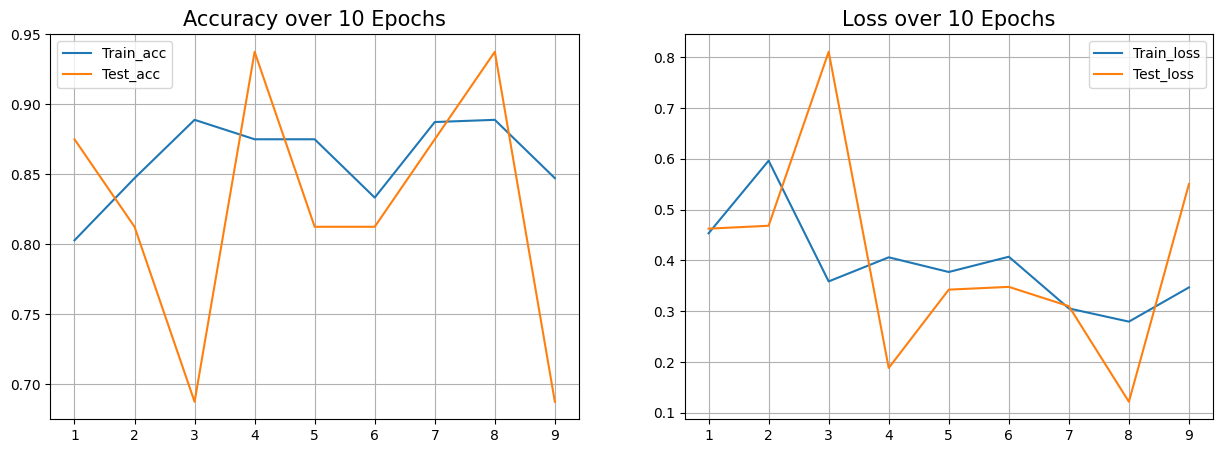

In [41]:
import matplotlib.pyplot as plt
def plot_acc_loss(hist, epochs):
  acc = hist.history['accuracy']
  loss = hist.history['loss']
  val_acc = hist.history['val_accuracy']
  val_loss = hist.history['val_loss']
  plt.figure(figsize=(15, 5))
  plt.subplot(121)
  plt.plot(range(1,epochs), acc[1:], label='Train_acc')
  plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
  plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.subplot(122)
  plt.plot(range(1,epochs), loss[1:], label='Train_loss')
  plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
  plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.show()
 
plot_acc_loss(hist,10)